In [89]:
import sys

import darkdetect
import gmsh
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg
from matplotlib import pyplot as plt

from examples.gen_unit_circle import gen_unit_circle
from fem.matrix.load_vector import load_node
from fem.matrix.stiffness_matrix import stiffness_node
from fem.mesh.mesh_2d import make_mesh
from fem.plot.plot_mesh import plot_mesh
from fem.plot.plot_pot import plot_pot
from util.gmsh_model import gmsh_model

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [90]:
## matplotlib settings
if darkdetect.isDark():
    plt.style.use('dark_background')
else:
    plt.style.use('default')

plt.rcParams.update({
    "text.usetex": True
})

## Setup problem
### 1) Mesh generation

In [91]:
sys.argv.append('-nopopup')
gen_unit_circle()
msh = make_mesh()

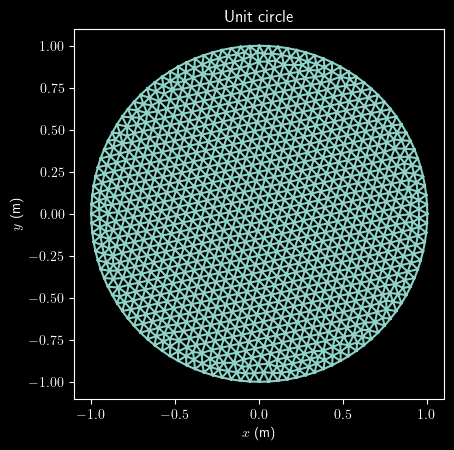

In [92]:
plot_mesh(msh, title='Unit circle')

### 2) Right hand side - charge distribution

In [93]:
def phi_ana(p: np.ndarray):
    return 1 / (4*np.pi*np.linalg.norm(p, axis=1))

def point_charge(p: np.ndarray):
    return 1 if np.linalg.norm(p) < 2e-2 else 0

q = load_node(msh, point_charge, 1)

### 3) Matrix assembly

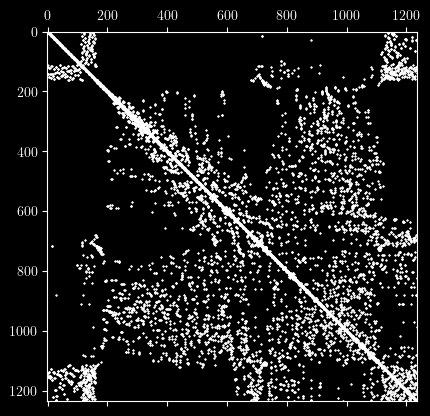

In [94]:
K = stiffness_node(msh)
plt.spy(K, markersize=.5)

## Solution
### 1) Solve system

In [95]:
phi_h, info = sp.linalg.gmres(K, q)
print(f"gmres terminated with exit code {info}")

gmres terminated with exit code 12360


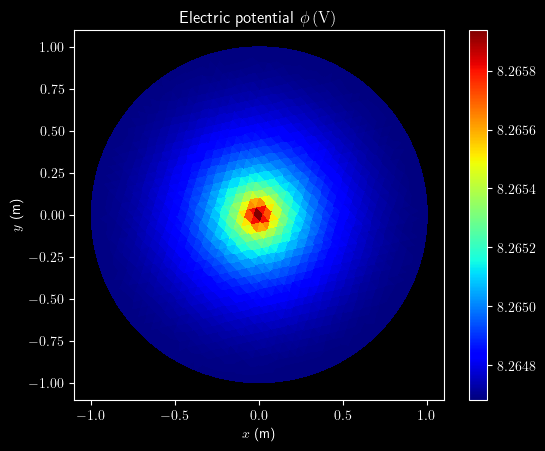

In [96]:
plot_pot(msh, phi_h, title=r'Electric potential $\phi\,\mathrm{(V)}$', cmap='jet')

### 2) Calculate L2 error

In [97]:
phi = phi_ana(msh.nodes)
err = np.linalg.norm(phi_h - phi) / np.linalg.norm(phi)
print(f"Relative L2 error between numerical and analytical solution = {100*err:.4f}%")

Relative L2 error between numerical and analytical solution = 3546.9390%
